In [65]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
from tqdm import tqdm

In [66]:
#데이터 불러오기
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [67]:
#데이터 특성 파악
for i in cancer.keys():
    try:
        print(len(cancer[i]))
    except:
        print("NO")
        

569
569
NO
2
5044
30
17
21


In [68]:
data = pd.DataFrame(cancer["data"], columns=cancer["feature_names"])
target = pd.DataFrame(cancer["target"], columns=["target"])
can = pd.concat([data,target], axis = 1)

can

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [69]:
can["target"].value_counts(0)

1    357
0    212
Name: target, dtype: int64

In [70]:
x_train, x_test, y_train, y_test = train_test_split(can[cancer["feature_names"]],can["target"], random_state=0, stratify=cancer.target)

100%|██████████| 15/15 [00:00<00:00, 86.93it/s]


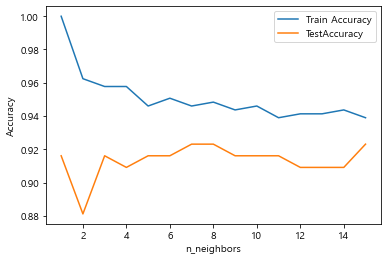

In [71]:
#가장 적합한 하이퍼파라미터(n_neighbors)를 찾기
train_acc = []
test_acc = []

for i in tqdm(range(1,16)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train,y_train)
    
    train_acc.append(model.score(x_train,y_train))
    test_acc.append(model.score(x_test,y_test))
    
    
    
plt.plot(range(1,16), train_acc, label = "Train Accuracy")
plt.plot(range(1,16), test_acc, label="TestAccuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

### 1. 과소적합이아닌 조건: Test Accuracy가 높다.
### 2. 과대적합이 아닌 조건: Train Accuracy와 Test Accuracy의 차이가 적다

In [74]:
# 가장 높은 test_Acc, train_acc와 test_acc간 차이가 가장적은 하이퍼파라미터(n_neighbors ) 찾기

best_train_acc = 0
best_test_acc = 0
best_k = 0
for i in tqdm(range(1, 16)):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    
    #test_acc가 가장 큰 값 + 그때의 train_acc 저장
    if best_test_acc < test_acc:
        best_test_acc = test_acc
        best_train_acc = train_acc
        best_k = i
    #best_test_acc와 test_acc가 같을때, train_acc값과 test_acc값의 차가 가장 적은 hyperparam 구하기
    elif best_test_acc == test_acc:
        if abs(best_train_acc - best_test_acc) > abs(train_acc - test_acc):
            best_test_acc = test_acc
            best_train_acc = train_acc
            best_k = i
        else:
            pass
    else:
        pass
print(best_k)   

100%|██████████| 15/15 [00:00<00:00, 87.55it/s]

15
